In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
import astropy.io.fits as fits
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import pyfits
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')

/home/lynge/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data = fits.open('NGC3783_1_10_J.fits')
print data[0].header

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  512 / length of data axis 1                          NAXIS2  =                  512 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BZERO   =             0.000000 / offset data range to that of unsigned short    BSCALE  =             1.000000 / default scaling factor                         EXPOSURE=                 9180 / Total Exposure Time                            OBJECT  = 'NGC3783 '           / [string] Target Name                           IMAGETYP= 'OBJECT  '           / [string

In [3]:
def pixel(x,y):
    RA = RAstd + x*pixspa - RAstdpix*pixspa
    DEC = DECstd + y*pixspa - DECstdpix*pixspa
    return RA, DEC

(174.78755005563335, -37.73606360310001)
[[   3   12    8    4    6    5   29   23   15   12]
 [  13   19   26   29   34   23   23   24   20   17]
 [  26   33   39   70  114  103   77   38   20   21]
 [  33   48   91  393  897  796  372  146   72   32]
 [  45   91  293 1484 3101 2553 1140  373  126   47]
 [  50  187  755 2435 3962 3038 1508  541  156   51]
 [  77  485 1600 2958 4565 3677 1837  672  218   85]
 [ 127  937 2713 3227 3325 3253 1897  734  250  113]
 [ 110  914 2975 3116 2170 1754 1188  558  190   82]
 [  70  486 1695 2184 1635 1004  561  274  123   59]
 [  44  187  591  921  859  552  274  128   72   58]
 [  23   77  184  255  274  232  139   66   38   45]
 [  14   32   59   70   86   74   57   37   28   32]
 [  12   26   24   25   37   26   22   20   19   23]
 [   8   18   18   11   19   19   16   22   21   12]]
[[   3   12    8    4    6    5   29   23   15   12]
 [  13   19   26   29   34   23   23   24   20   17]
 [  26   33   39   70  114  103   77   38   20   21]
 [  

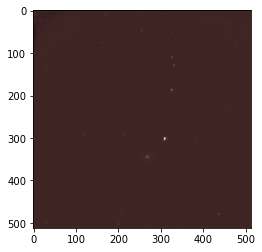

In [5]:
plt.figure()
plt.imshow(data[0].data, cmap='pink')
AGNdata = data[0].data
header = data[0].header
RAstd = header['CRVAL1']
DECstd = header['CRVAL2']
#print RAstd, DECstd
pixspa = header['PIXSCALE']/(3600.)
#print pixspa
RAstdpix = header['CRPIX1']
DECstdpix = header['CRPIX2']

test = pyfits.getdata('NGC3783_1_10_J.fits')


d = 512 - 295
f = 512 - 305
g = 512 - 255
h = 512 - 265
#print d,f,g,h
#print pixel(40,100)
#print pixel(300,300)
#print pixel(450,500)
print pixel(300,305)
print AGNdata[295:310,305:315]
print test[295:310,305:315]
#for i in range(500):
#    print i, max(AGNdata[:,i])
#    print pixel(i,300)
#print AGNdata[290:300,160:170]

In [6]:
c = SkyCoord('11h39m01.68s', '-37d44m18.2s')
c1 = SkyCoord('11h39m50s', '-37d44m18.2s')
print c.ra.deg, c.dec.deg
#c.dec.lat
sc = SkyCoord(header['GEOLAT'],header['GEOLON'],header['GEOELEV'],frame='barycentrictrueecliptic',unit='deg',representation = 'unitspherical')
print sc.galactic
print sc.obsgeoloc

astropy.coordinates.ICRS().representation_info

174.757 -37.7383888889
<SkyCoord (Galactic): (l, b) in deg
    ( 289.80685891, -45.97381024)>
None


{astropy.coordinates.representation.CartesianRepresentation: {u'names': [u'x',
   u'y',
   u'z'],
  u'units': [None, None, None]},
 astropy.coordinates.representation.UnitSphericalDifferential: {u'names': (u'pm_ra',
   u'pm_dec'),
  u'units': (Unit("mas / yr"), Unit("mas / yr"))},
 astropy.coordinates.representation.SphericalRepresentation: {u'names': (u'ra',
   u'dec',
   u'distance'),
  u'units': (Unit("deg"), Unit("deg"), None)},
 astropy.coordinates.representation.UnitSphericalRepresentation: {u'names': (u'ra',
   u'dec'),
  u'units': (Unit("deg"), Unit("deg"))},
 astropy.coordinates.representation.RadialRepresentation: {u'names': [u'distance'],
  u'units': [None]},
 astropy.coordinates.representation.PhysicsSphericalRepresentation: {u'names': [u'phi',
   u'theta',
   u'r'],
  u'units': [Unit("deg"), Unit("deg"), None]},
 astropy.coordinates.representation.CylindricalRepresentation: {u'names': [u'rho',
   u'phi',
   u'z'],
  u'units': [None, Unit("deg"), None]},
 astropy.coordinate

In [7]:
data = fits.open('NGC3783_1_10_J.fits')[0]
dataW = WCS(data.header)
#sky = fits.open('NGC3783_3_10_K_sky.fits')
#correct = data - sky


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


-37.7279236031
0.0003391667
174.765504222
-0.0003391667


/home/lynge/anaconda2/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to -4.896e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.733e+01 [aplpy.core]


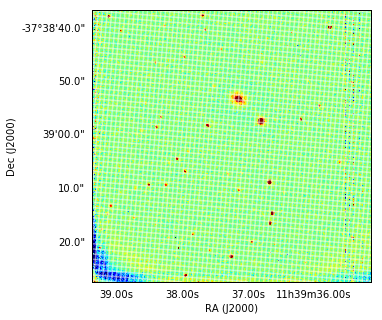

In [8]:
print data.header['CRVAL2']
print data.header['CDELT2']
print data.header['CRVAL1']
print data.header['CDELT1']

ap = apl.FITSFigure(data,figsize=(5,5))
#ap.recenter(c.ra.deg,c.dec.deg,0.0053391667)
ap.show_colorscale(aspect='auto')
ap.add_grid()
ap.show_circles(c.ra.deg,c.dec.deg,0.0053391667)

#ap.set_xaxis_coord_type('longitude')

INFO: Auto-setting vmin to -4.896e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.733e+01 [aplpy.core]


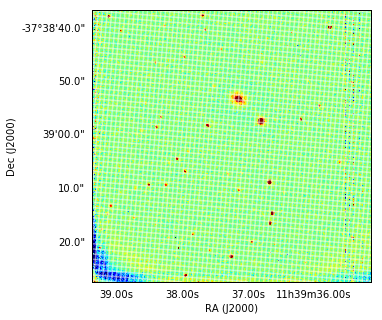

In [9]:
ap = apl.FITSFigure(data,figsize=(5,5))
#ap.recenter(c.ra.deg,c.dec.deg,0.0053391667)
ap.show_colorscale(aspect='auto')
ap.add_grid()
ap.show_circles(174.774,-37.7550888889,0.004)

INFO: Auto-setting vmin to -4.896e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.733e+01 [aplpy.core]


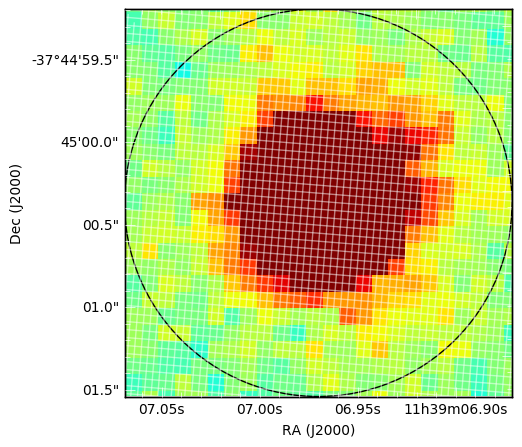

In [57]:
ap = apl.FITSFigure(data,figsize=(5,5))
ap.recenter(174.774,-37.7540888889,0.004)
ap.show_colorscale(aspect='auto')
ap.add_grid()
ap.show_circles(174.774,-37.7540888889,0.004)

INFO: Auto-setting vmin to -4.896e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.733e+01 [aplpy.core]


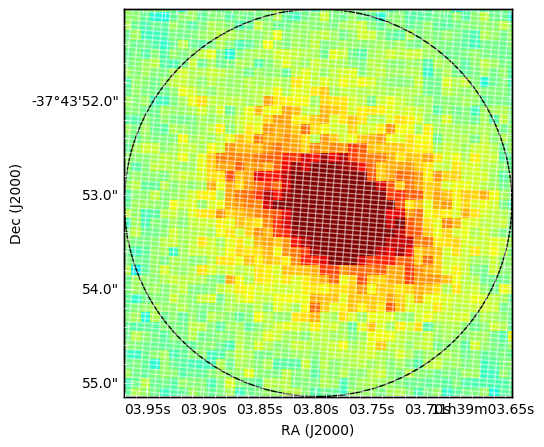

In [58]:
ap = apl.FITSFigure(data,figsize=(5,5))
ap.recenter(c.ra.deg,c.dec.deg,0.007)
ap.show_colorscale(aspect='auto')
ap.add_grid()
ap.show_circles(c.ra.deg,c.dec.deg,0.007)

INFO: Auto-setting vmin to -4.896e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.733e+01 [aplpy.core]


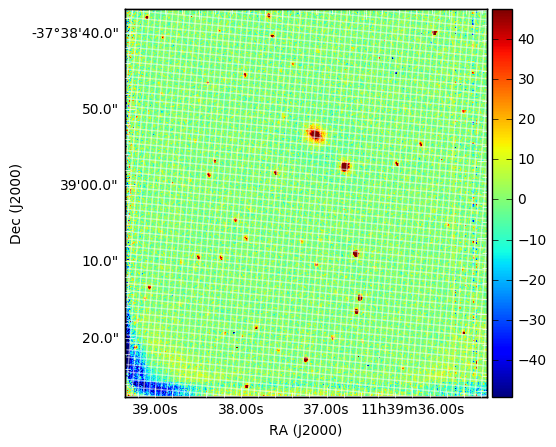

In [59]:
ap = apl.FITSFigure(data,figsize=(5,5))
ap.show_colorscale(aspect='auto')
ap.add_colorbar()
ap.add_grid()

In [60]:
print AGNdata[200:300][200:300] #sum(AGNdata[200:300,200:300]), sum(AGNdata), np.shape(AGNdata)

[]


In [65]:
xaxis=(np.arange(header['NAXIS1'])-(header['CRPIX1']-1))*header['CDELT1']*60.0**2
yaxis=(np.arange(header['NAXIS2'])-(header['CRPIX2']-1))*header['CDELT2']*60.0**2
X, Y = np.meshgrid(xaxis, yaxis)

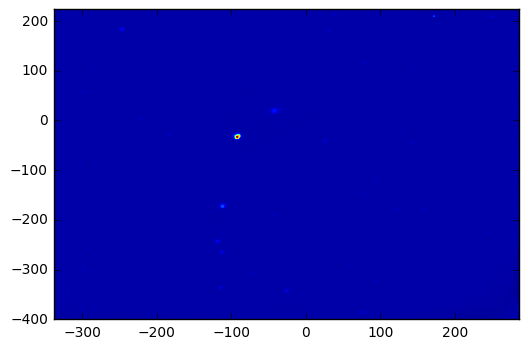

In [67]:
plt.figure()
plt.contourf(X,Y,AGNdata,500)
plt.show()

In [71]:
AGNsum = 0
for i in range(100):
    for j in range(100):
        AGNsum = AGNsum + AGNdata[i+300,j+300]
print AGNsum

72754
